# Movie Recommendation System

Welcome to the Movie Recommendation System Jupyter Notebook! This notebook demonstrates the implementation of a collaborative filtering-based movie recommendation system using Python and the MovieLens dataset. 

## Overview

Recommendation systems have become an integral part of our daily lives, helping us discover new movies, music, products, and more. Collaborative filtering is a popular approach in recommendation systems, leveraging the collective behavior of a group of users to make recommendations.

In this notebook, we will use the MovieLens dataset, which contains a vast collection of movie ratings from a large number of users. Our goal is to build a recommendation system that analyzes these ratings and provides personalized movie recommendations based on user preferences.

## Dataset

The MovieLens dataset is widely used in the field of recommender systems and contains movie ratings provided by users. It consists of two main files: "movies.csv" and "ratings.csv". The "movies.csv" file provides details about movies, including movie IDs and titles. The "ratings.csv" file contains user ratings for various movies, including user IDs, movie IDs, ratings, and timestamps.

## Model Workflow

The Movie Recommendation System follows the following workflow:

1. **Data Loading**: We start by loading the MovieLens dataset into our notebook using the pandas library. This involves loading the "movies.csv" and "ratings.csv" files into dataframes for further analysis.

2. **Data Cleaning and Manipulation**: We perform necessary data cleaning and manipulation steps to prepare the dataset for analysis. This may include handling missing values, dropping irrelevant columns, and merging relevant dataframes.

3. **Exploratory Data Analysis (EDA)**: EDA helps us understand the characteristics of the dataset, discover patterns, and gain insights. We visualize the distribution of rating counts and average ratings to understand the popularity and quality of movies.

4. **Collaborative Filtering**: Collaborative filtering is the backbone of our movie recommendation system. We implement item-based collaborative filtering, where we measure the similarity between movies based on user ratings. This allows us to recommend movies that are similar to the ones a user has already rated positively.

5. **Movie Recommendations**: Using the collaborative filtering approach, we create a function that takes a movie title as input and recommends similar movies. The function calculates the similarity scores between movies and provides the top-n most similar movies as recommendations.

Now, let's dive into building our Movie Recommendation System and discover exciting movies that match our preferences!

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load the MovieLens dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
# Data Cleaning and Manipulation
# Drop unnecessary columns from the movies dataset
movies = movies.drop(['genres'], axis=1)

In [4]:
# Merge movies and ratings datasets based on movieId
movie_data = pd.merge(ratings, movies, on='movieId')

In [5]:
movie_data

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)
...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997)
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971)
100833,610,160836,3.0,1493844794,Hazard (2005)
100834,610,163937,3.5,1493848789,Blair Witch (2016)


In [6]:
# Perform EDA (Exploratory Data Analysis)
# Count the number of ratings for each movie
movie_ratings_count = movie_data.groupby(['title'])['rating'].count().reset_index().rename(columns={'rating': 'rating_count'})

In [7]:
# Calculate the average rating for each movie
movie_ratings_mean = movie_data.groupby(['title'])['rating'].mean().reset_index().rename(columns={'rating': 'rating_mean'})

In [8]:
# Create a consolidated movie dataset with rating count and average rating
movie_ratings = pd.merge(movie_ratings_count, movie_ratings_mean, on='title')

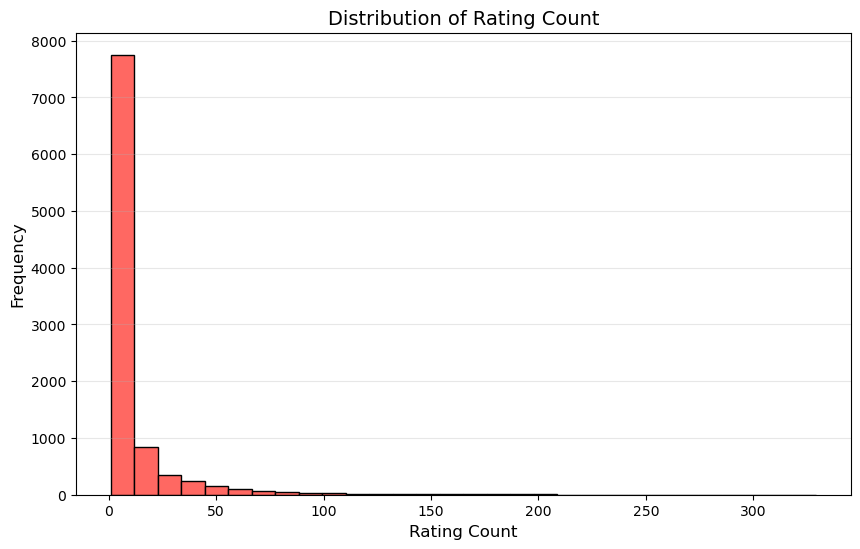

In [9]:
# Plot a histogram of the rating count distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating_count'], bins=30, edgecolor='black', color='#FF6862')
plt.xlabel('Rating Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Rating Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.show()

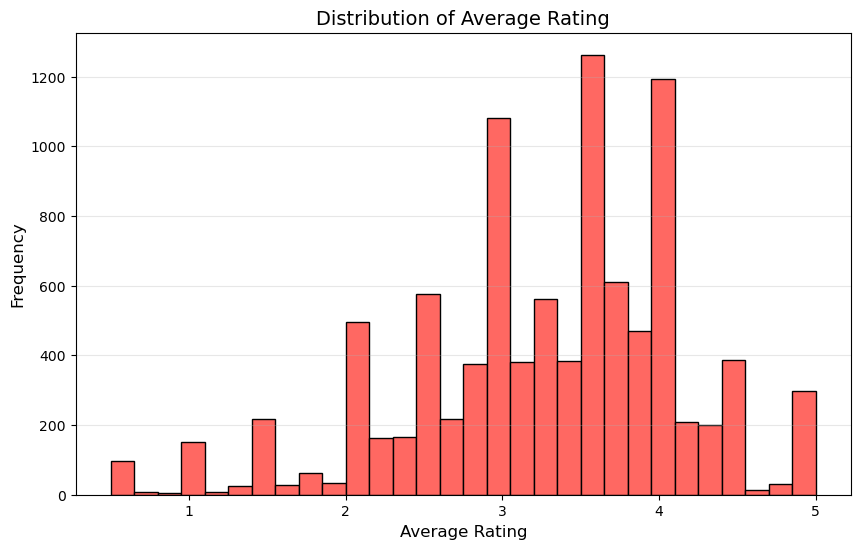

In [10]:
# Plot a histogram of the average rating distribution
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating_mean'], bins=30, edgecolor='black', color='#FF6862')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Average Rating', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [11]:
# Collaborative Filtering
# Create a pivot table with userIds as rows and movie titles as columns
user_movie_matrix = movie_data.pivot_table(index='userId', columns='title', values='rating')

In [12]:
# Replace missing values with 0 (if a user hasn't rated a movie)
user_movie_matrix = user_movie_matrix.fillna(0)

In [13]:
# Calculate the cosine similarity between movies
movie_similarity = cosine_similarity(user_movie_matrix.T)

In [14]:
# Convert the similarity matrix to a DataFrame
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

In [15]:
# Recommend movies based on user input
def recommend_movies(movie_title, top_n=5):
    # Get the similarity scores for the given movie
    similar_movies = movie_similarity_df[movie_title].sort_values(ascending=False)
    
    # Filter out the given movie from the list of similar movies
    similar_movies = similar_movies.drop(movie_title)
    
    # Get the top n most similar movies
    top_similar_movies = similar_movies.head(top_n)
    
    return top_similar_movies

In [16]:
# Example usage
recommended_movies = recommend_movies("Lost in La Mancha (2002)")
print(recommended_movies)

title
Shape of Things, The (2003)    0.786301
Big One, The (1997)            0.744100
Max (2002)                     0.740383
Dancer Upstairs, The (2002)    0.712761
Love Liza (2002)               0.710042
Name: Lost in La Mancha (2002), dtype: float64


## Conclusion

In this notebook, we have built a Movie Recommendation System using collaborative filtering. We leveraged the MovieLens dataset to analyze movie ratings and provide personalized movie recommendations based on user preferences. Here are the key findings:

- The distribution of rating counts revealed that most movies had a relatively low number of ratings, indicating that some movies are more popular and well-known than others.
- The distribution of average ratings showed that the majority of movies had average ratings around 3.5 to 4.0, suggesting a generally positive sentiment towards movies in the dataset.
- By implementing item-based collaborative filtering, we were able to recommend movies similar to a given movie based on user ratings. This approach helps users discover new movies based on their preferences.

The Movie Recommendation System can be further enhanced by incorporating additional features such as genre information, user demographics, or employing more advanced recommendation algorithms. This notebook serves as a starting point for building a movie recommendation system and can be extended and customized based on specific requirements.

We hope this notebook has provided valuable insights into building a collaborative filtering-based recommendation system and demonstrated the potential for personalized movie recommendations.

Happy movie watching!
